<a href="https://www.kaggle.com/code/omereliyahu/classifier?scriptVersionId=128762850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [55]:

import os
import numpy as np
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai
    
!pip install -U duckduckgo_search   
from duckduckgo_search import ddg_images
from fastcore.all import *

now lets defin the function thats going to find us an image

In [56]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [72]:
urls = search_images('tower photos', max_images=20)
urls[9]

Searching for 'tower photos'


'http://images1.fanpop.com/images/photos/2300000/The-Eiffel-Tower-paris-2393939-1920-2560.jpg'

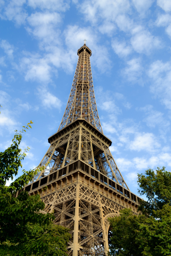

In [58]:
from fastdownload import download_url
dest = 'tower.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'house photos'


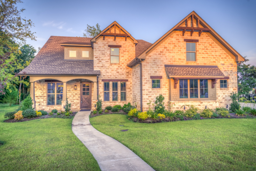

In [59]:
download_url(search_images('house photos', max_images=1)[0], 'house.jpg', show_progress=False)
Image.open('house.jpg').to_thumb(256,256)

In [60]:
searches = 'tower','house'
path = Path('tower_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'tower photo'
Searching for 'tower sun photo'
Searching for 'tower shade photo'
Searching for 'house photo'
Searching for 'house sun photo'
Searching for 'house shade photo'


In [61]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

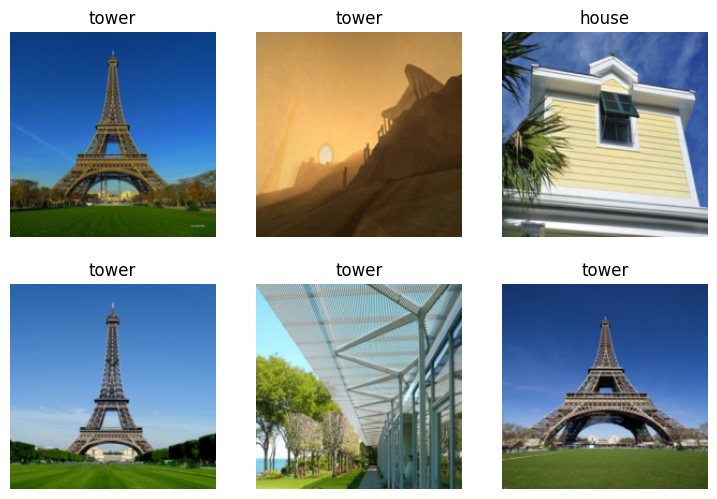

In [62]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [63]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.668886,0.120994,0.043478,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.095848,0.004487,0.000000,01:35
1,0.052351,0.000676,0.000000,01:36
2,0.031070,0.000434,0.000000,01:36


**now, lets see a the prediction for a house picture i took from the internet, searching in hebrew(it increases the probabillity the picture is not on the training set)**

This is a: house.
Probability it's a tower: 1.0000


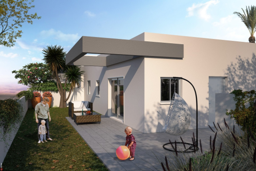

In [64]:


new_dest1 = 'new_house.jpg'
new_url1 = 'https://images1.ynet.co.il/PicServer5/2017/08/20/7980460/8.jpg'
download_url(new_url1,new_dest1,show_progress=False)

is_tower1,_,probs1 = learn.predict(PILImage.create('new_house.jpg'))
print(f"This is a: {is_tower1}.")
print(f"Probability it's a tower: {probs1[0]:.4f}")

Image.open(new_dest1).to_thumb(256,256)


****

**lets see what about a towerpicture i found online**

This is a: tower.
Probability it's a tower: 0.0014


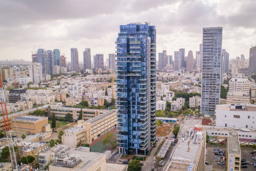

In [65]:
new_dest2 = 'new_tower1.jpg'
new_url2 = 'https://s-gilboa.co.il/wp-content/uploads/2021/06/2416-1.jpg'
download_url(new_url2,new_dest2,show_progress=False)

is_tower2,_,probs2 = learn.predict(PILImage.create('new_tower1.jpg'))
print(f"This is a: {is_tower2}.")
print(f"Probability it's a tower: {probs2[0]:.4f}")

Image.open(new_dest2).to_thumb(256,256)